# Общая информация

Корреляции между датчиками смартфона, алгоритмами и соответствующими методами являются основными компонентами, облегчающими локализацию и отслеживание в помещении при отсутствии стандартов связи и локализации. Можно отметить серьезный пробел в исследованиях с точки зрения объяснения связей между этими компонентами для выяснения последствий и проблем моделей, предназначенных для локализации и отслеживания в помещении.  

Данные были отобраны с частотой 10 Гц в течение пяти секунд в фиксированных местах.  
Кроме того, данные также собирались во время движения.  

Из-за того, что наш мир не настолько идеален и реальный объект это не просто двигающийся кубик в неком пустом пространстве, создаются множество проблем для получения инерциального навигационого решения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = ""

Загрузим данные

In [2]:
from google.colab import drive

url = '/content/drive/My Drive/Colab Notebooks/'
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
dataset = pd.read_csv(url + 'data/accelerometer_gyro_mobile_phone_dataset.csv')

# Информация о наборе данных

Выведим некоторую информацию па набору данных

In [ ]:
dataset.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [ ]:
dataset.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
dataset.describe(include=['O'])

,timestamp
count,31991
unique,21776
top,54:46.9
freq,4


Пропуски отсутствуют

In [4]:
n_features = 6

## Преобразуем timestamp

In [ ]:
for i, t in zip(range(dataset.shape[0]), dataset.timestamp.values):
  d = t.split(sep=' ')
  if len(d) != 1:
    print(i, d)

20928 ['6/25/2022', '14:05']


In [5]:
def time(timestamp):
  time = []
  hour = 0
  for x in timestamp:
    t = x.split(sep=' ')
    if len(t) != 1:
      t = t[-1]
    else:
      t = t[0]
    min, sec = t.split(sep=':')
    min = float(min)
    if min == 0:
      hour += 1
    time.append(hour*60.0*60.0 + min*60.0 + float(sec))
  return time

sec = time(dataset.timestamp.values)

In [6]:
dataset.timestamp = sec
# И сместим точку отчета в ноль
dataset.timestamp -= dataset.timestamp[0]

In [ ]:
describe = dataset.describe()
describe

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,3.199100e+04,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,9.873494e+05,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,6.137616e+05,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000e+00,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,6.540909e+05,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,6.557339e+05,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.279527e+06,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,2.021333e+06,1.000000


## Визуализация данных

### Покажем распределение измерений

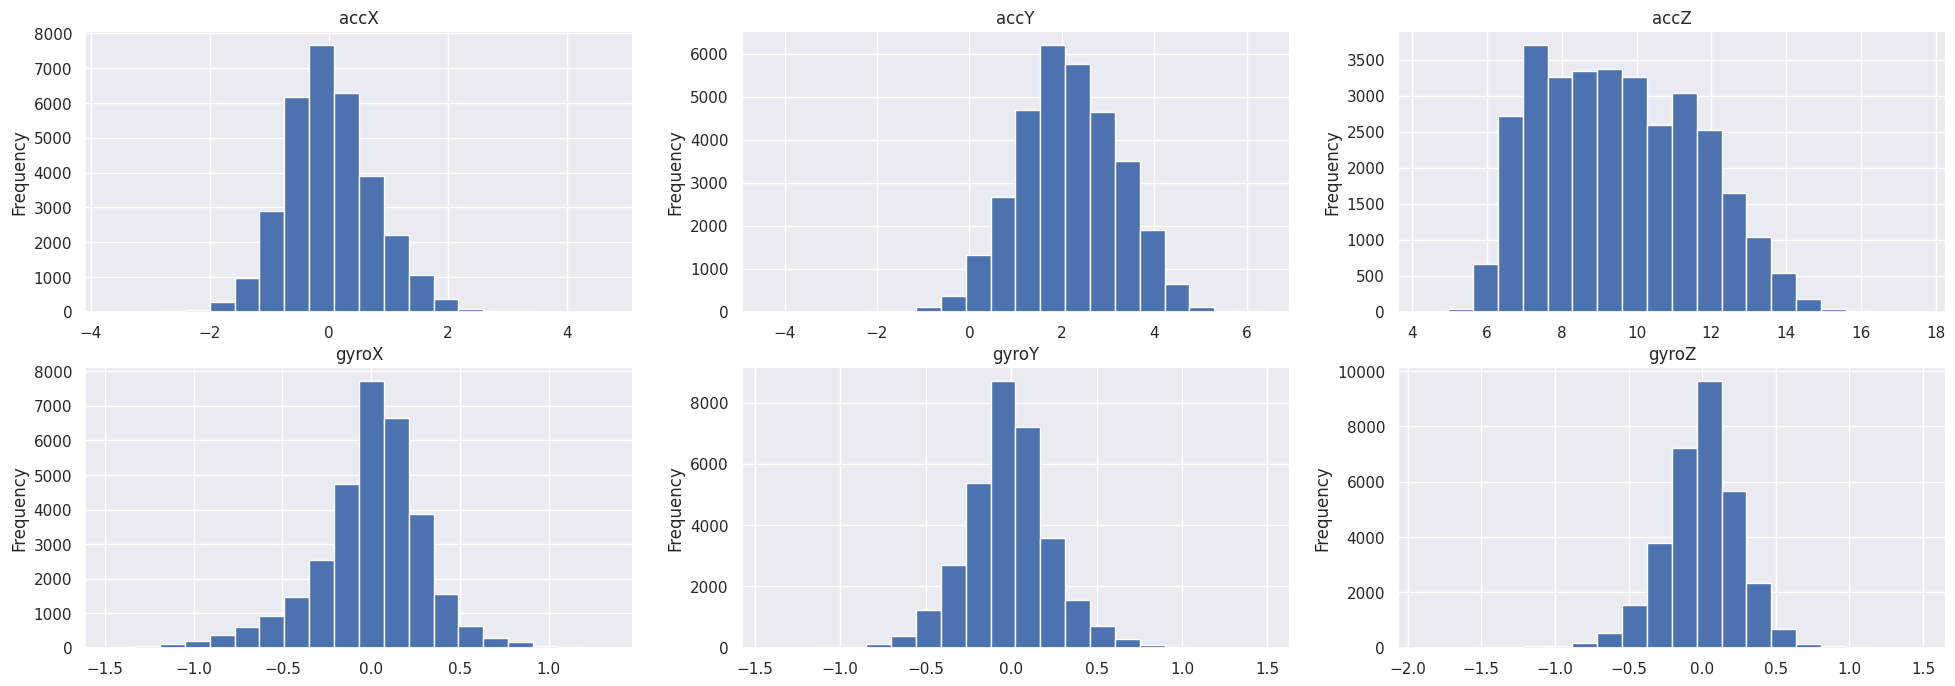

In [ ]:
plt.figure(figsize=(8*3,4*2))


for i, col in zip(range(n_features), dataset.columns[:-2]):
    plt.subplot(2, 3, i+1)

    dataset[col].plot(kind='hist', bins=20, title=col)
    plt.gca().spines[['top', 'right',]].set_visible(False)

**Видем, что данные с гироскопа и акселерометра подчиняются гауссовскому распределению. Это дает понять, что в основном в приборах присутствует гауссовский шум.**

### Рассмотрим временные ряды

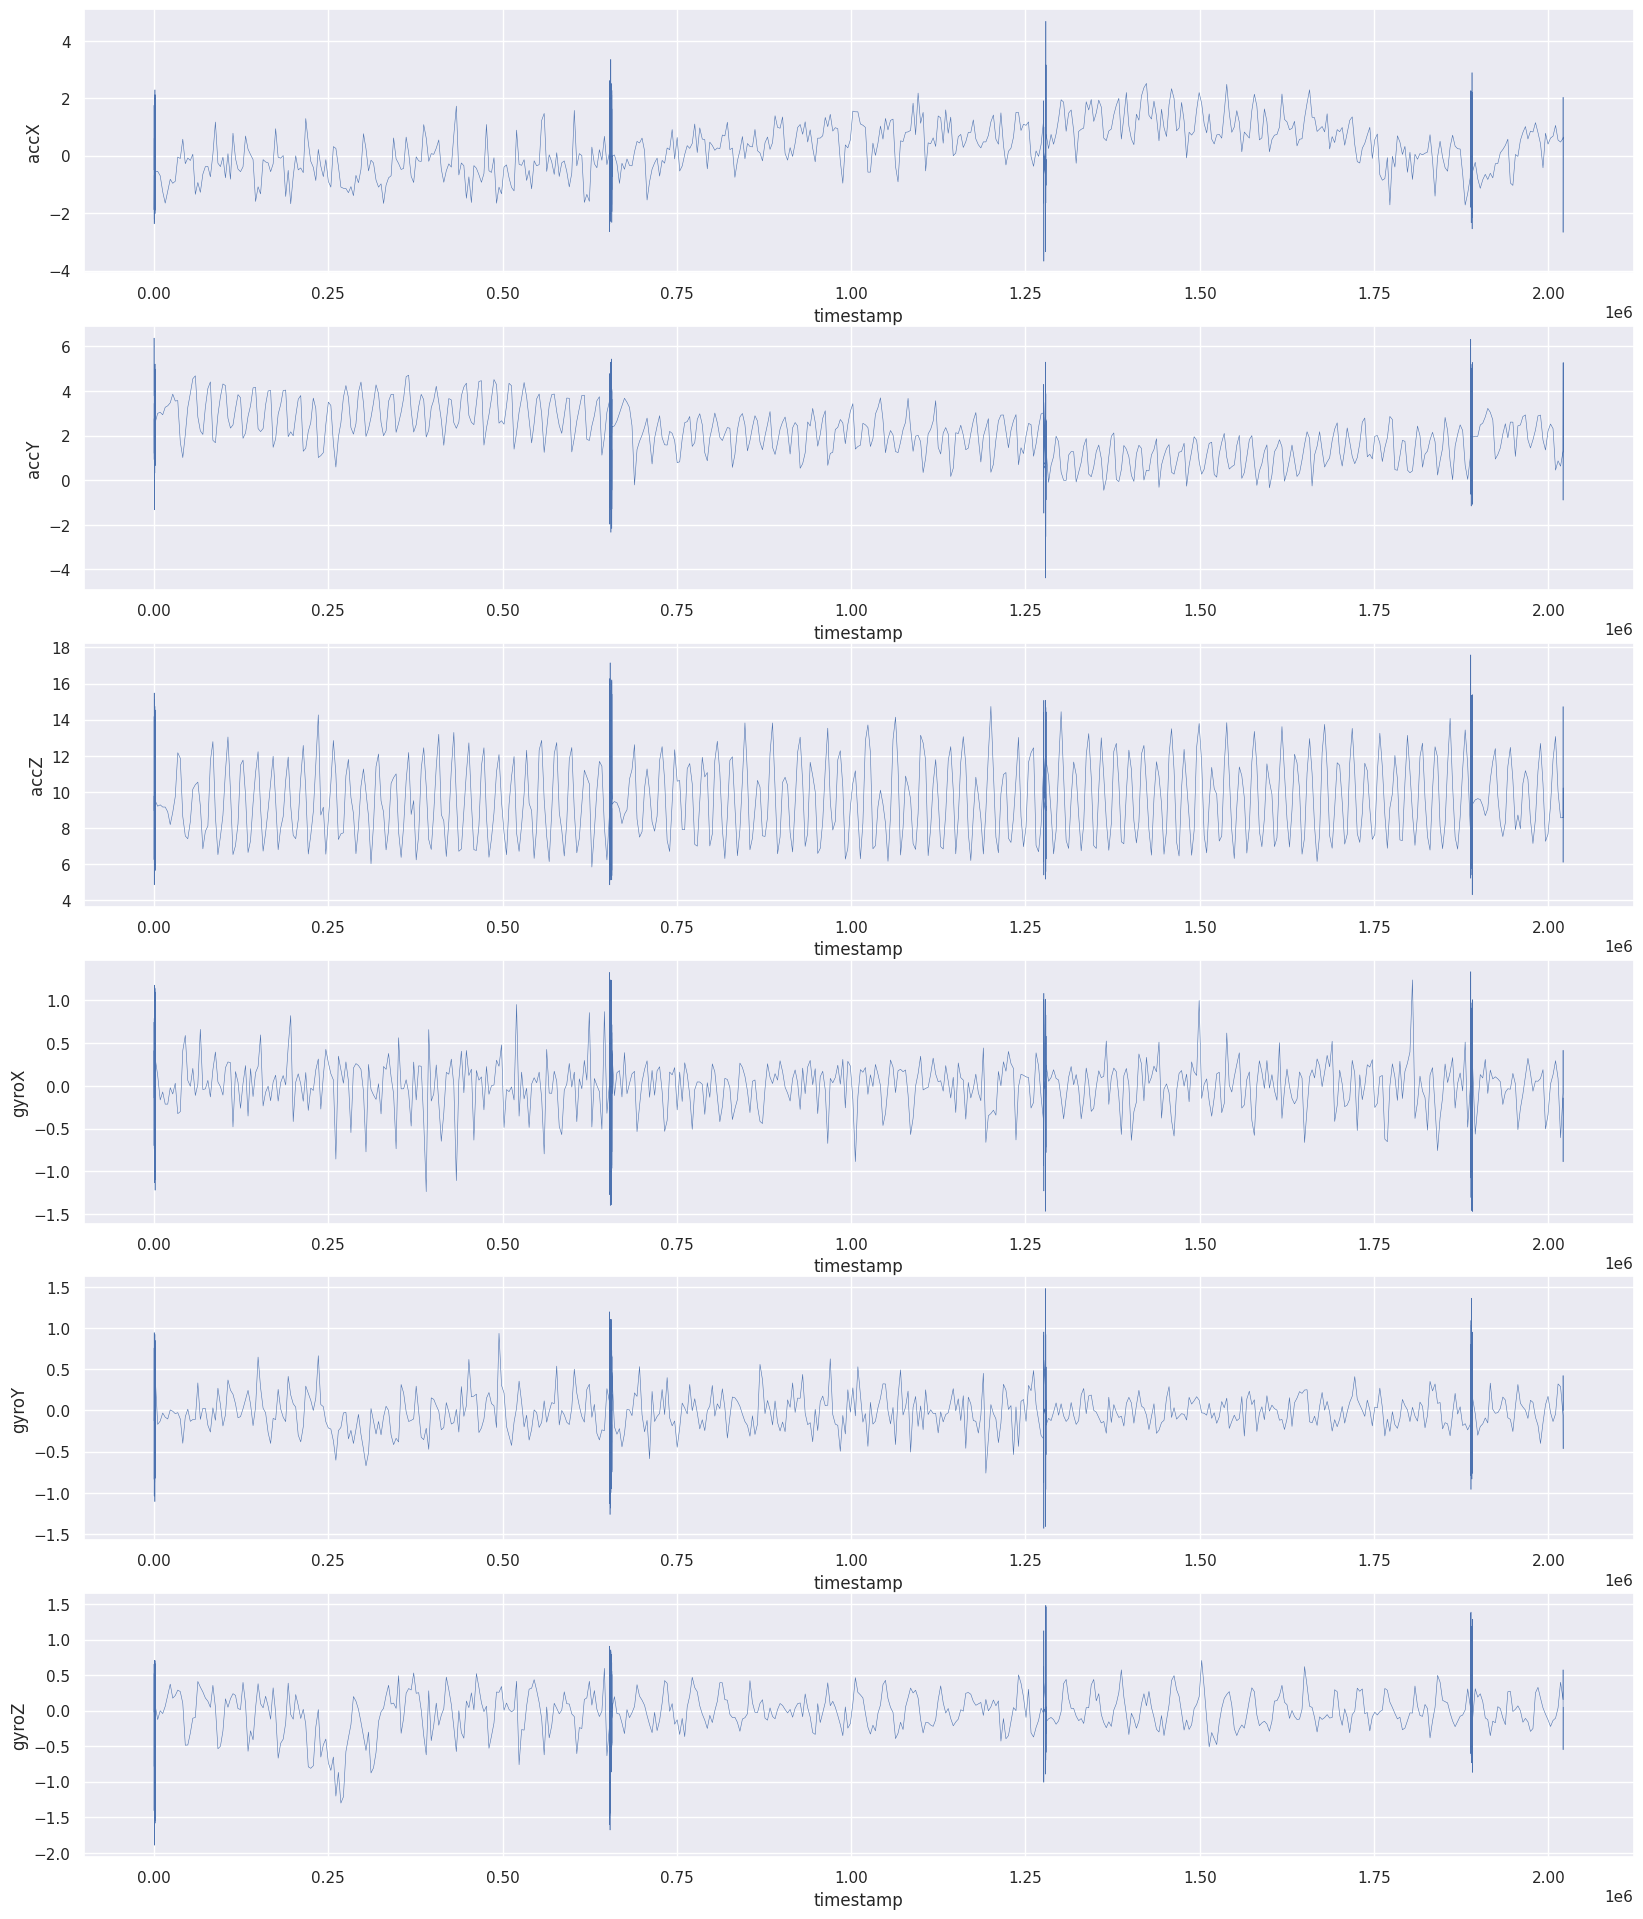

In [ ]:
plt.figure(figsize=(20,4*n_features))


for i, col in zip(range(n_features), dataset.columns[:-2]):
  plt.subplot(n_features, 1, i+1)
  plt.plot(dataset.timestamp, dataset[col], lw=0.4)

  plt.xlabel('timestamp')
  plt.ylabel(col)
plt.show()

Text(0, 0.5, 'Activity')

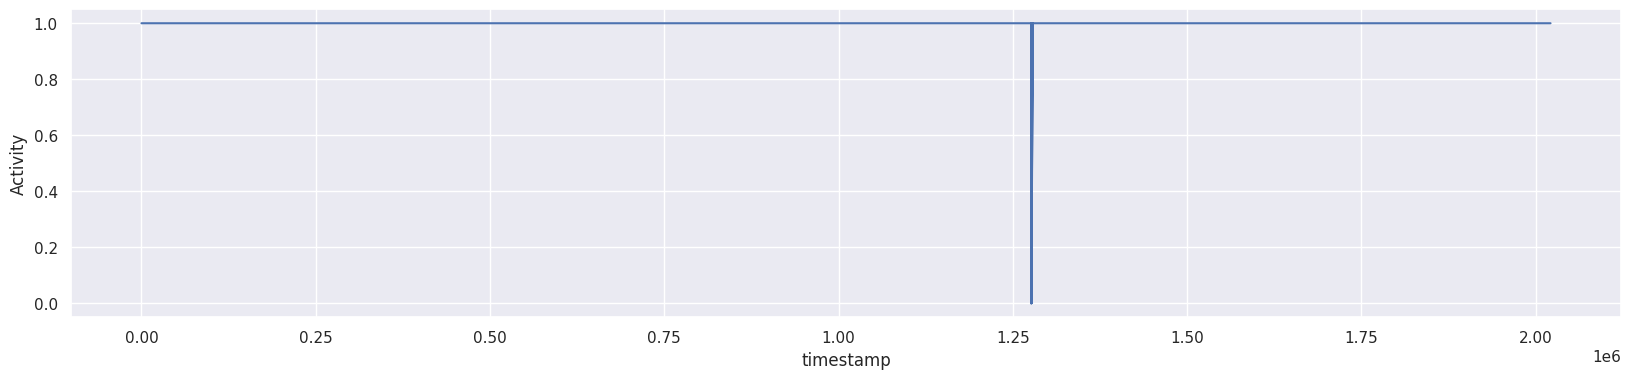

In [ ]:
plt.figure(figsize=(20,4))

plt.plot(dataset.timestamp, dataset.Activity)
plt.xlabel('timestamp')
plt.ylabel('Activity')

### Вывод

**По графикам видно, что измерения можно представить, как сумму тригонометрических функций, где частоты будут меняться со временем.**

**Можно попытаться перейти в частотное пространство, используя Фурье-преобразование или Вейвлет-преобразование.**

**В реальности для таких задач мог бы подойти cкользящее Фурье-преобразование (SDFT), как, к примеру, при получении электрокардиограммы.**

Для решение задачи как раз можно получить ряды частот с амплитудами и для каждой из оси приборов использовать свой оптимальный набор частот с пороговыми значениями магнитуд, говоря простым языком.  
Есть только в этом одна важная проблема, пороги находятся для фиксированной системы координат, так как есть сила тяжести.

Из-за этого, IMU должны приводиться к конкретной СК, обычно это Международная земная система координат, либо просчитываться во время работы, но для этого надо получать точные данные с других источников.

Выбор частот, по которым в дальнейшем будет обучаться одна из модель, зависит от профиля движения объекта, в основном это низкочастотный спектр примерно до 10 Гц. Так как выше, либо шумы, либо редкие мгновенные действия.  
Человек может быстро повернуться, но на небольшой угол, и делать это часто.  
Оставаясь зачастую неподвижно.   
А вот ускорение наоборот может оказаться большим, но не продолжительным.  
Ещё сильно зависит от расположения телефона, в руках он, в сумке или в кармане.  

Это приводит на мысль, что определение стоянки будет обладать хорошой точностью, но с низкой полнотой или низкой точностью и большой полнотой.  
Я считаю, что здесь важно как можно меньше ложных ответов, так как они могут приводить к увеличению ошибки определения локализации.

# Предобработка данных

## Фурье и Вейвлет преобразования

Получим Фурье графики

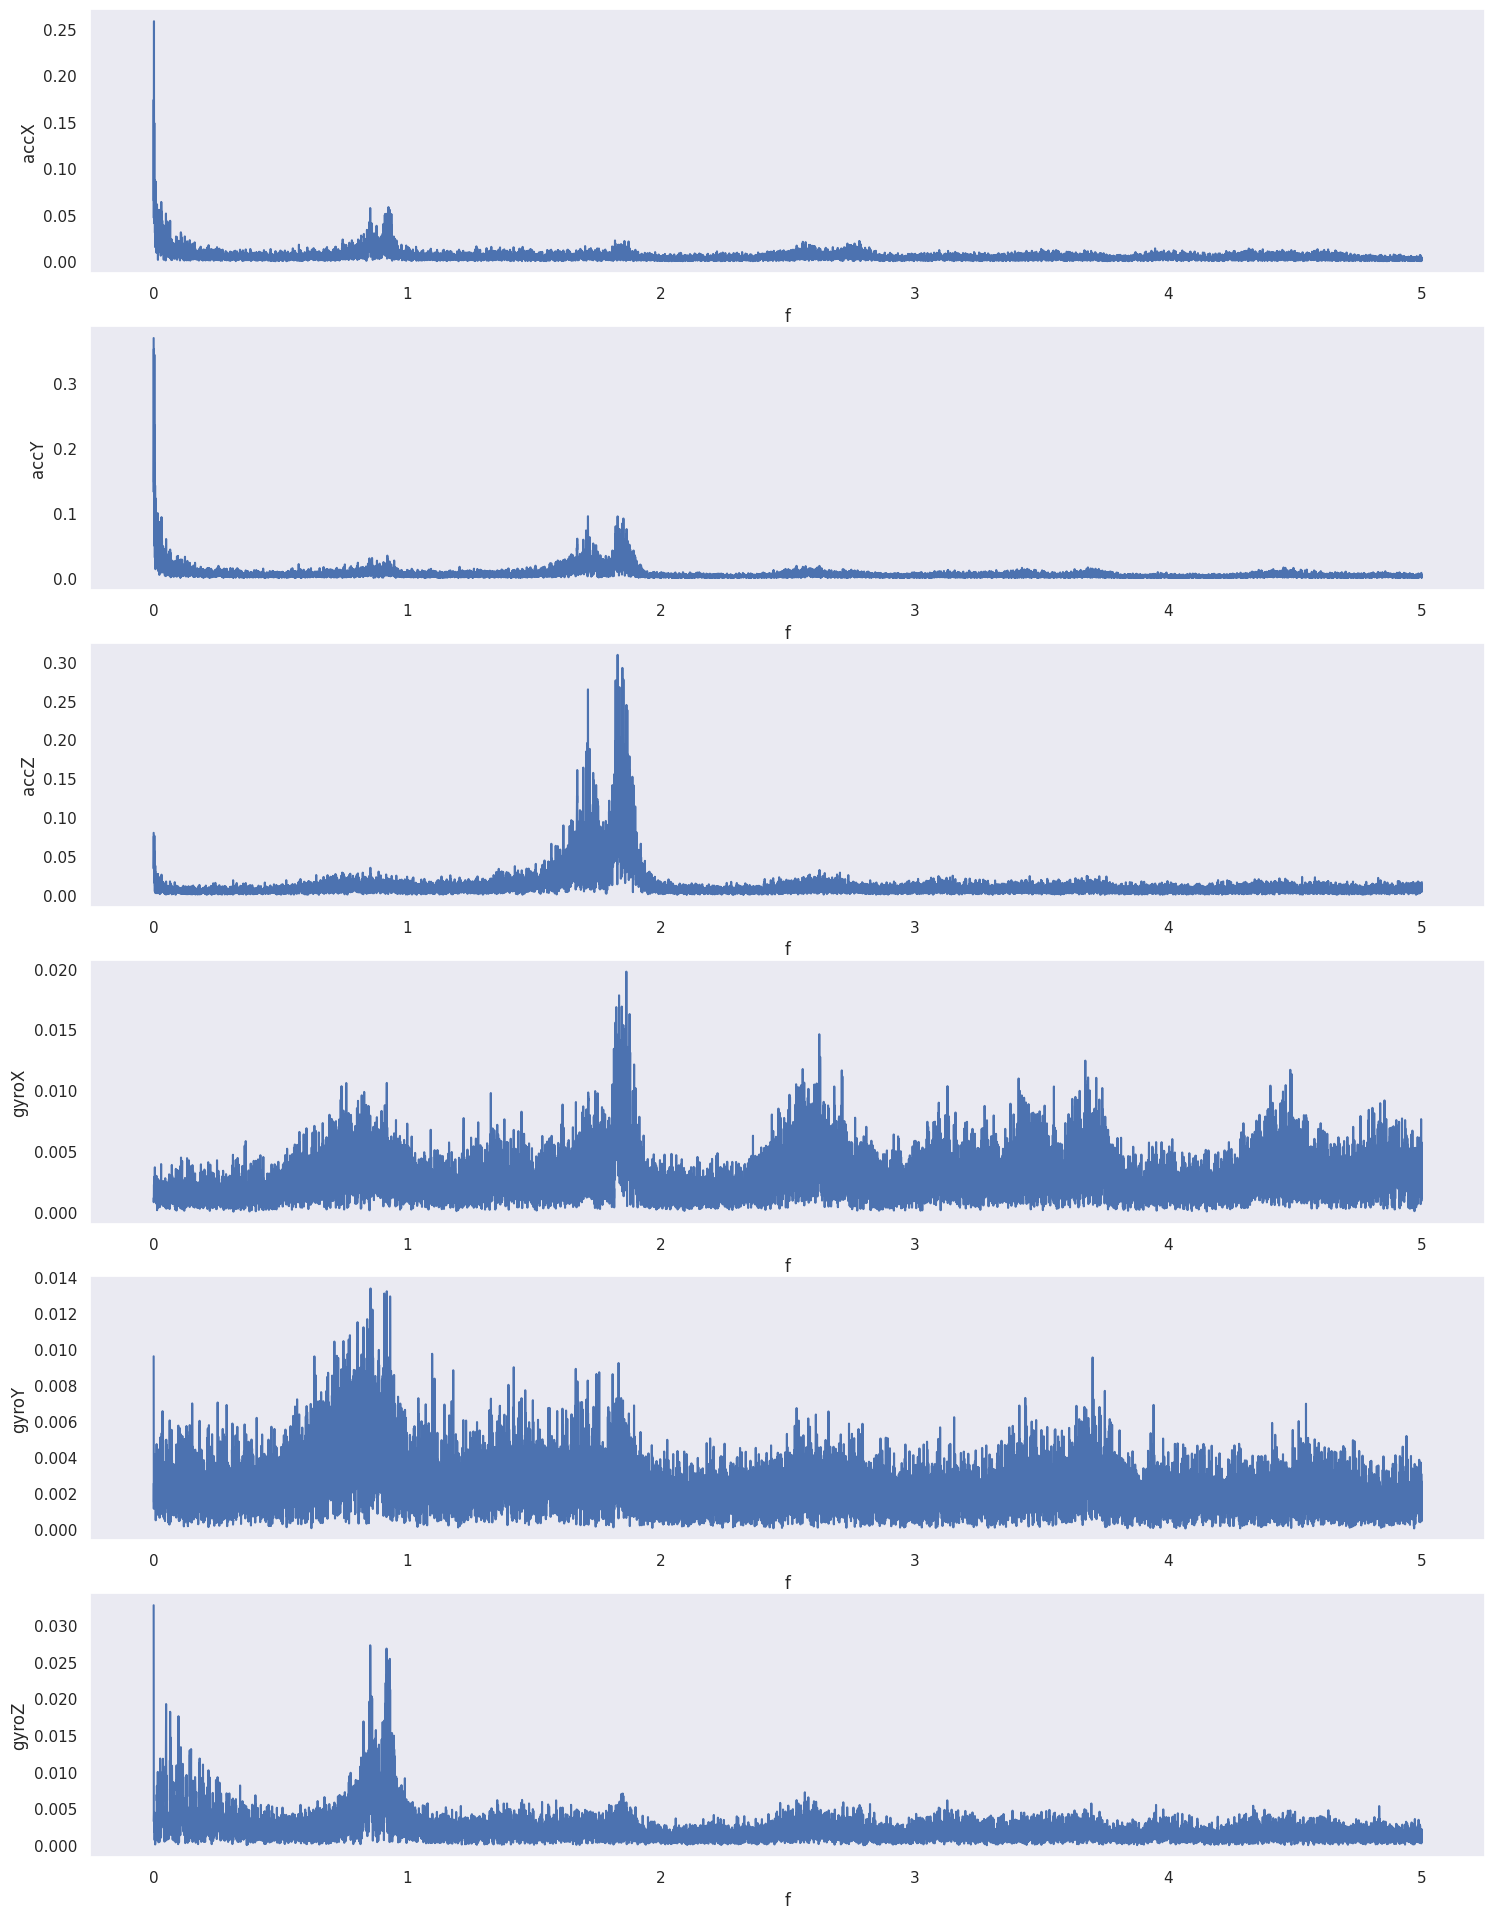

In [17]:
from scipy.fft import fft, fftfreq, fftshift

T = dataset.timestamp[1] - dataset.timestamp[0]
x = dataset.timestamp.values
N = dataset.shape[0]

plt.figure(figsize=(18,4*n_features))


for i, col in zip(range(n_features), dataset.columns[:-2]):
  y = dataset[col].values
  yf = fft(y)
  xf = fftfreq(N, T)[1:N//2]

  plt.subplot(n_features, 1, i+1)
  plt.plot(xf, 2.0/N * np.abs(yf[1:N//2]))
  plt.grid()


  plt.xlabel('f')
  plt.ylabel(col)
plt.show()

Нулевая гармоника является суммой значений сигнала.  
Как видем, нам это особо ничего не говорит.

Посмотрим на Вейвлет

<ipython-input-35-807d608e95aa>:14: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwtm = signal.cwt(y, signal.morlet2, widths, w=w)


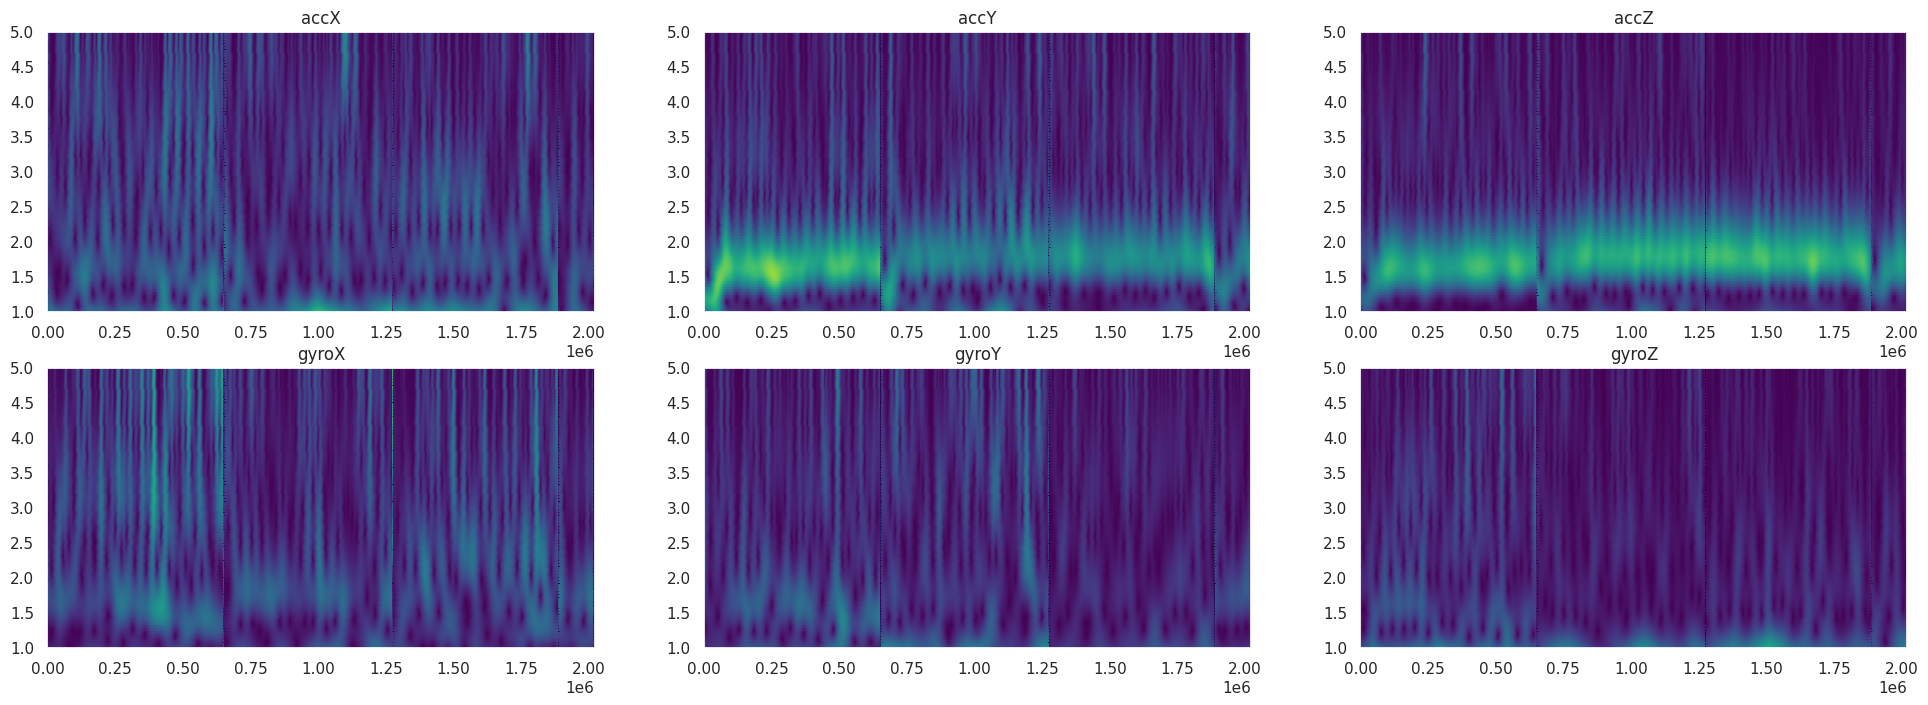

In [35]:
from scipy import signal

fs = 1/T
w = 5.
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)

plt.figure(figsize=(8*3,4*2))

for i, col in zip(range(n_features), dataset.columns[:-2]):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    y = dataset[col].values
    cwtm = signal.cwt(y, signal.morlet2, widths, w=w)
    plt.pcolormesh(x, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()

Чем светлей, тем выше амплитуда сигнала

## Алгоритм скользящего ДПФ

Период измерений отвечает за границы спектра (0.1 сек, это 10)

[Статья с SDFT](https://www.music.mcgill.ca/~ich/research/misc/papers/cr1137.pdf)

In [247]:
from scipy.fft import fft

def SDFT(f, n_window, freq):
  """
  f - массив с измерениями
  n_window - длина окна, ввиде количества семплов
  freq - набор частот

  результат: двумерный массив
  """

  T = 0.1 # период измерений
  max_freq = 1 / (2*T) # максимальная частота, из свойств ДПФ
  dfreq = 2 * max_freq / n_window # растояние между частотами, разрешимость
  N = len(f)

  F = []

  s = len(freq)
  F0 = np.zeros(s, dtype=complex)

  # Начальное распределение
  y = fft(f[:n_window])
  for i, v in zip(range(s), freq):
      n_v = int(v / dfreq)
      F0[i] = y[n_v]
  F.append(2/n_window*np.abs(F0))

  i_t = n_window + 1
  while(i_t < N):
    for i, v in zip(range(s), freq):
      n_v = v / dfreq
      F0[i] = np.exp(2.0*np.pi*1.j*n_v/n_window)*(F0[i] - f[i_t-n_window] + f[i_t])
    F.append(2/n_window*np.abs(F0))
    i_t +=1
  return F

### Проверка алгоритма

In [250]:
freq = range(0, 5)
df_accX = pd.DataFrame(data=SDFT(dataset.accX.values, 20, freq), columns=freq)
df_accX

,0,1,2,3,4
0,1.178783,0.297661,0.196515,0.098078,0.118920
1,1.226010,0.326080,0.241638,0.091280,0.082995
2,1.236279,0.327026,0.247444,0.081252,0.084310
3,1.207599,0.342193,0.265539,0.070787,0.076642
4,1.214050,0.336138,0.259638,0.076498,0.072540
...,...,...,...,...,...
31966,1.002525,0.260627,0.341590,0.211707,0.104369
31967,0.944985,0.251848,0.372237,0.263704,0.151718
31968,0.870395,0.213730,0.333909,0.222571,0.136418
31969,0.828258,0.179176,0.292192,0.194344,0.114503


In [251]:
N = 30
T = 0.1
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(1.0 * 2.0*np.pi*x) + 0.5*np.sin(4.0 * 2.0*np.pi*x)

freq = range(0, 5)
SDFT(y, 10, freq)

[array([1.44328993e-16, 1.00000000e+00, 1.98707376e-16, 1.74347804e-16,
        5.00000000e-01]),
 array([2.66453526e-16, 1.00000000e+00, 2.64214949e-16, 1.73019547e-16,
        5.00000000e-01]),
 array([1.44328993e-16, 1.00000000e+00, 1.63361301e-16, 3.00087366e-16,
        5.00000000e-01]),
 array([1.77635684e-16, 1.00000000e+00, 1.49676051e-16, 3.18609523e-16,
        5.00000000e-01]),
 array([7.77156117e-17, 1.00000000e+00, 2.48589812e-16, 2.53902319e-16,
        5.00000000e-01]),
 array([1.26701484e-16, 1.00000000e+00, 2.29111845e-16, 2.06623463e-16,
        5.00000000e-01]),
 array([2.10942375e-16, 1.00000000e+00, 1.97213908e-16, 3.91930873e-16,
        5.00000000e-01]),
 array([3.10862447e-16, 1.00000000e+00, 1.78795887e-16, 3.36565575e-16,
        5.00000000e-01]),
 array([2.55351296e-16, 1.00000000e+00, 2.28815375e-16, 3.64717892e-16,
        5.00000000e-01]),
 array([3.33066907e-16, 1.00000000e+00, 1.99118842e-16, 4.17817651e-16,
        5.00000000e-01]),
 array([1.86109291e-

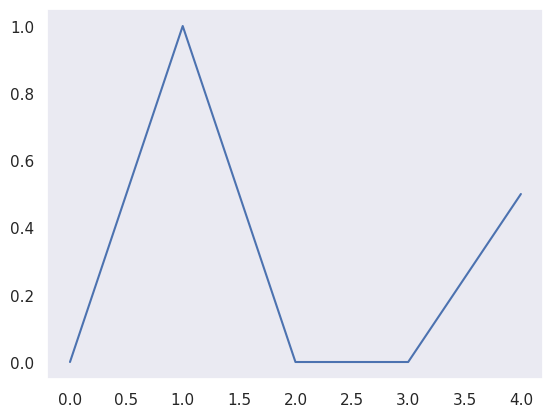

array([1.44328993e-16, 1.00000000e+00, 1.98707376e-16, 1.74347804e-16,
       5.00000000e-01])

In [252]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 10
# sample spacing
T = 0.1
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(1.0 * 2.0*np.pi*x) + 0.5*np.sin(4.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

np.abs(2.0/N *yf[0:N//2])

По идее должно работать.

### Преобразования данных